In [1]:
# Importing required libraries
import pandas as pd
import pickle
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Reading the pickled data
with open('binfiles/train_data.pkl','rb') as file:
    train_data = pickle.load(file)
    
with open('binfiles/train_label.pkl','rb') as file:
    train_label = pickle.load(file)

In [3]:
#importing libraries of machine learning algorithm 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

#importing libararies for selecting model
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier

/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [4]:
log = LogisticRegression(solver='liblinear',max_iter=10000)
knn = KNeighborsClassifier()
nb = MultinomialNB()
XGB = GradientBoostingClassifier()
dec_tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

models = [('LR', log),
          ('KNN',knn),
          ('XGB',XGB),
          ('NB',nb),
          ('Decision Tree',dec_tree),
          ('Random Forest',forest)]

In [5]:
# Train all models 
for name, model in models:
    now = datetime.now()
    print(f'{name} training started at {now.strftime("%H:%M:%S")}')
    model.fit(train_data,train_label)
    now = datetime.now()
    print(f'{name} training completed at {now.strftime("%H:%M:%S")}')

LR training started at 17:06:56
LR training completed at 17:10:40
KNN training started at 17:10:40
KNN training completed at 17:10:40
XGB training started at 17:10:40
XGB training completed at 17:15:37
NB training started at 17:15:37
NB training completed at 17:15:37
Decision Tree training started at 17:15:37
Decision Tree training completed at 17:20:05
Random Forest training started at 17:20:05
Random Forest training completed at 17:30:33


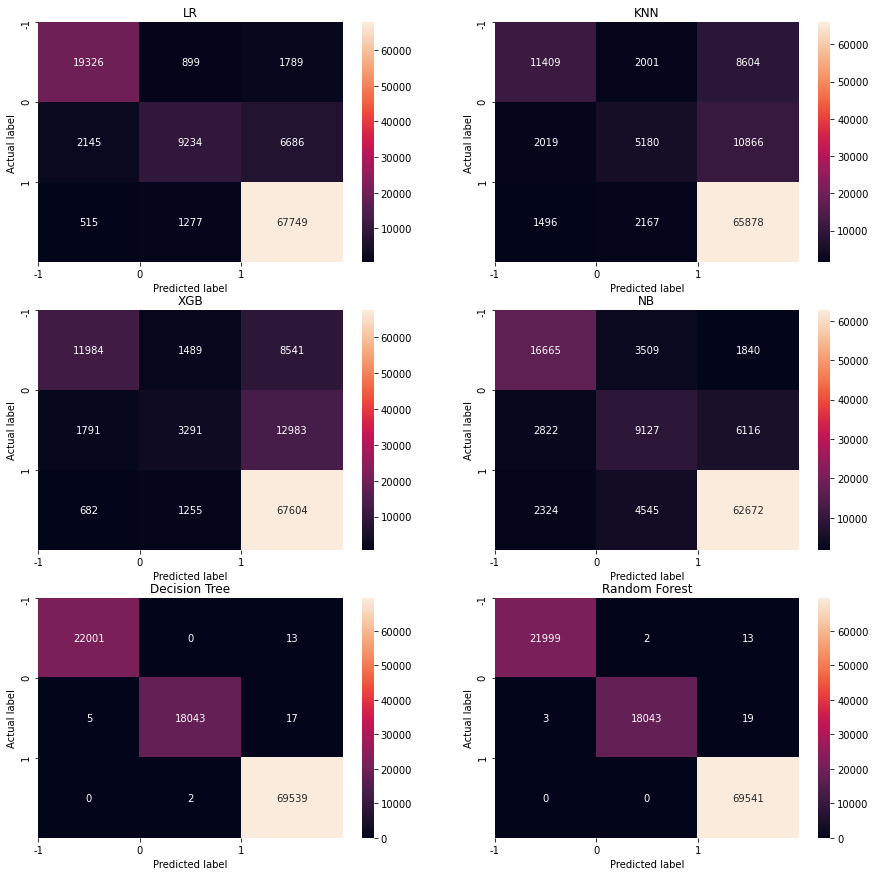

In [6]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15,15))
for i, model in enumerate(models):
    plt.subplot(3,2,i+1)
    y_predict = model[1].predict(train_data)
    cmatrix = confusion_matrix(train_label,y_predict)
    class_names=['-1','0','1'] # name  of classes
    # create heatmap
    sns.heatmap(pd.DataFrame(cmatrix, columns=class_names), annot=True, fmt='g')
    plt.title(model[0])
    plt.xticks(range(3),['-1','0','1'])
    plt.yticks(range(3),['-1','0','1'])
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
plt.show()

In [7]:
acc_score = []
f1_score = []
model_name = []

#Creating a DataFrame to store performance of each model
df_results = pd.DataFrame(columns=['Name','F1 Mean','F1 STD',
                                   'Accuracy Mean','Accuracy STD'])

#Performing cross validation for each model to find the best model
i=0
for name,model in models:
    print(f'Training {name}')
    #Cross Validation
    accuracy = cross_val_score(model,train_data,train_label,cv=10,
                             scoring='accuracy',
                            n_jobs=-1,verbose=10)

    f1 = cross_val_score(model,train_data,train_label,cv=10,
                             scoring='f1_weighted',
                            n_jobs=-1,verbose=10)
    #Appending the result to list
    acc_score.append(accuracy)
    f1_score.append(f1)
    model_name.append(name)
    #Appending the performance to the Dataframe
    df_results.loc[i] = [name,
                         f1.mean(),
                         f1.std(),
                         accuracy.mean(),
                         accuracy.std()]
    i += 1
#Displaying the performance of the cross validation    
df_results.sort_values(by=['F1 Mean'],ascending=False)

Training LR
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.803) total time= 2.5min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.5min remaining:    0.0s


[CV] END ................................ score: (test=0.801) total time= 2.6min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  5.1min remaining:    0.0s


[CV] END ................................ score: (test=0.799) total time= 3.1min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  8.1min remaining:    0.0s


[CV] END ................................ score: (test=0.797) total time= 2.9min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 11.0min remaining:    0.0s


[CV] END ................................ score: (test=0.799) total time= 2.5min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 13.5min remaining:    0.0s


[CV] END ................................ score: (test=0.796) total time= 3.1min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 16.6min remaining:    0.0s


[CV] END ................................ score: (test=0.796) total time= 3.2min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed: 19.8min remaining:    0.0s


[CV] END ................................ score: (test=0.800) total time= 2.2min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 22.0min remaining:    0.0s


[CV] END ................................ score: (test=0.799) total time= 2.7min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 24.7min remaining:    0.0s


[CV] END ................................ score: (test=0.802) total time= 3.0min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 27.7min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.787) total time= 2.5min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.5min remaining:    0.0s


[CV] END ................................ score: (test=0.784) total time= 2.6min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  5.0min remaining:    0.0s


[CV] END ................................ score: (test=0.781) total time= 3.1min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  8.1min remaining:    0.0s


[CV] END ................................ score: (test=0.779) total time= 2.9min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 11.0min remaining:    0.0s


[CV] END ................................ score: (test=0.782) total time= 2.5min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 13.4min remaining:    0.0s


[CV] END ................................ score: (test=0.779) total time= 3.1min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 16.5min remaining:    0.0s


[CV] END ................................ score: (test=0.779) total time= 3.2min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed: 19.7min remaining:    0.0s


[CV] END ................................ score: (test=0.784) total time= 2.1min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 21.9min remaining:    0.0s


[CV] END ................................ score: (test=0.781) total time= 2.7min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 24.6min remaining:    0.0s


[CV] END ................................ score: (test=0.785) total time= 3.0min
Training KNN
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 27.6min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.661) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] END ................................ score: (test=0.659) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  2.7min remaining:    0.0s


[CV] END ................................ score: (test=0.661) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.1min remaining:    0.0s


[CV] END ................................ score: (test=0.652) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  5.5min remaining:    0.0s


[CV] END ................................ score: (test=0.659) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.8min remaining:    0.0s


[CV] END ................................ score: (test=0.654) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  8.2min remaining:    0.0s


[CV] END ................................ score: (test=0.651) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:  9.5min remaining:    0.0s


[CV] END ................................ score: (test=0.659) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 10.9min remaining:    0.0s


[CV] END ................................ score: (test=0.657) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 12.2min remaining:    0.0s


[CV] END ................................ score: (test=0.661) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 13.6min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.618) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] END ................................ score: (test=0.615) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  2.8min remaining:    0.0s


[CV] END ................................ score: (test=0.611) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.1min remaining:    0.0s


[CV] END ................................ score: (test=0.608) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  5.5min remaining:    0.0s


[CV] END ................................ score: (test=0.617) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.9min remaining:    0.0s


[CV] END ................................ score: (test=0.611) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  8.2min remaining:    0.0s


[CV] END ................................ score: (test=0.607) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:  9.6min remaining:    0.0s


[CV] END ................................ score: (test=0.612) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 11.0min remaining:    0.0s


[CV] END ................................ score: (test=0.616) total time= 1.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 12.4min remaining:    0.0s


[CV] END ................................ score: (test=0.617) total time= 1.4min
Training XGB
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 13.7min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.752) total time=19.2min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 19.2min remaining:    0.0s


[CV] END ................................ score: (test=0.754) total time=19.1min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 38.3min remaining:    0.0s


[CV] END ................................ score: (test=0.752) total time=19.2min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 57.5min remaining:    0.0s


[CV] END ................................ score: (test=0.749) total time=19.3min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 76.8min remaining:    0.0s


[CV] END ................................ score: (test=0.753) total time=19.1min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 95.9min remaining:    0.0s


[CV] END ................................ score: (test=0.747) total time=19.2min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 115.1min remaining:    0.0s


[CV] END ................................ score: (test=0.750) total time=19.2min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed: 134.3min remaining:    0.0s


[CV] END ................................ score: (test=0.750) total time=19.2min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 153.5min remaining:    0.0s


[CV] END ................................ score: (test=0.753) total time=19.1min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 172.5min remaining:    0.0s


[CV] END ................................ score: (test=0.751) total time=19.0min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 191.5min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.714) total time=19.2min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 19.2min remaining:    0.0s


[CV] END ................................ score: (test=0.714) total time=19.0min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 38.2min remaining:    0.0s


[CV] END ................................ score: (test=0.713) total time=19.1min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 57.4min remaining:    0.0s


[CV] END ................................ score: (test=0.708) total time=19.2min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 76.6min remaining:    0.0s


[CV] END ................................ score: (test=0.715) total time=19.1min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 95.7min remaining:    0.0s


[CV] END ................................ score: (test=0.705) total time=19.2min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 114.9min remaining:    0.0s


[CV] END ................................ score: (test=0.712) total time=19.2min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed: 134.1min remaining:    0.0s


[CV] END ................................ score: (test=0.710) total time=19.2min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 153.3min remaining:    0.0s


[CV] END ................................ score: (test=0.713) total time=19.0min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 172.2min remaining:    0.0s


[CV] END ................................ score: (test=0.713) total time=18.9min
Training NB
[CV] START .....................................................................
[CV] END ................................ score: (test=0.778) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 191.2min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END ................................ score: (test=0.778) total time=   0.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.774) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV] END ................................ score: (test=0.774) total time=   0.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.770) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s


[CV] END ................................ score: (test=0.774) total time=   0.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.774) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.7s remaining:    0.0s


[CV] END ................................ score: (test=0.777) total time=   0.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.775) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.9s remaining:    0.0s


[CV] END ................................ score: (test=0.768) total time=   0.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.776) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END ................................ score: (test=0.774) total time=   0.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.772) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV] END ................................ score: (test=0.772) total time=   0.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.768) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s


[CV] END ................................ score: (test=0.771) total time=   0.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.773) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.8s remaining:    0.0s


[CV] END ................................ score: (test=0.775) total time=   0.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.774) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.0s remaining:    0.0s


[CV] END ................................ score: (test=0.766) total time=   0.1s
Training Decision Tree
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.669) total time= 3.6min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.6min remaining:    0.0s


[CV] END ................................ score: (test=0.680) total time= 3.7min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  7.3min remaining:    0.0s


[CV] END ................................ score: (test=0.674) total time= 3.7min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 11.0min remaining:    0.0s


[CV] END ................................ score: (test=0.675) total time= 3.6min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 14.6min remaining:    0.0s


[CV] END ................................ score: (test=0.677) total time= 3.7min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 18.2min remaining:    0.0s


[CV] END ................................ score: (test=0.682) total time= 3.6min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 21.8min remaining:    0.0s


[CV] END ................................ score: (test=0.666) total time= 3.6min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed: 25.4min remaining:    0.0s


[CV] END ................................ score: (test=0.673) total time= 3.6min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 29.0min remaining:    0.0s


[CV] END ................................ score: (test=0.676) total time= 3.7min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 32.7min remaining:    0.0s


[CV] END ................................ score: (test=0.677) total time= 3.6min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 36.3min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.665) total time= 3.6min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.6min remaining:    0.0s


[CV] END ................................ score: (test=0.670) total time= 3.7min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  7.3min remaining:    0.0s


[CV] END ................................ score: (test=0.670) total time= 3.7min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 11.0min remaining:    0.0s


[CV] END ................................ score: (test=0.670) total time= 3.6min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 14.6min remaining:    0.0s


[CV] END ................................ score: (test=0.673) total time= 3.7min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 18.3min remaining:    0.0s


[CV] END ................................ score: (test=0.677) total time= 3.6min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 22.0min remaining:    0.0s


[CV] END ................................ score: (test=0.662) total time= 3.7min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed: 25.6min remaining:    0.0s


[CV] END ................................ score: (test=0.668) total time= 3.7min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 29.3min remaining:    0.0s


[CV] END ................................ score: (test=0.670) total time= 3.7min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 32.9min remaining:    0.0s


[CV] END ................................ score: (test=0.675) total time= 3.6min
Training Random Forest
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 36.6min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.750) total time=10.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 10.4min remaining:    0.0s


[CV] END ................................ score: (test=0.751) total time=10.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 20.9min remaining:    0.0s


[CV] END ................................ score: (test=0.748) total time=10.5min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 31.4min remaining:    0.0s


[CV] END ................................ score: (test=0.751) total time=10.3min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 41.7min remaining:    0.0s


[CV] END ................................ score: (test=0.749) total time=10.3min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 52.1min remaining:    0.0s


[CV] END ................................ score: (test=0.748) total time=10.3min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 62.4min remaining:    0.0s


[CV] END ................................ score: (test=0.746) total time=10.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed: 72.8min remaining:    0.0s


[CV] END ................................ score: (test=0.747) total time=10.3min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 83.1min remaining:    0.0s


[CV] END ................................ score: (test=0.751) total time=10.3min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 93.4min remaining:    0.0s


[CV] END ................................ score: (test=0.747) total time=10.3min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 103.8min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.683) total time=10.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 10.4min remaining:    0.0s


[CV] END ................................ score: (test=0.681) total time=10.4min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 20.7min remaining:    0.0s


[CV] END ................................ score: (test=0.678) total time=10.5min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 31.2min remaining:    0.0s


[CV] END ................................ score: (test=0.682) total time=10.6min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 41.7min remaining:    0.0s


[CV] END ................................ score: (test=0.677) total time=10.6min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 52.3min remaining:    0.0s


[CV] END ................................ score: (test=0.680) total time=10.5min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 62.8min remaining:    0.0s


[CV] END ................................ score: (test=0.678) total time=10.5min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed: 73.4min remaining:    0.0s


[CV] END ................................ score: (test=0.677) total time=10.5min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 83.8min remaining:    0.0s


[CV] END ................................ score: (test=0.681) total time=10.5min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 94.3min remaining:    0.0s


[CV] END ................................ score: (test=0.679) total time=10.5min


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 104.8min finished


,Name,F1 Mean,F1 STD,Accuracy Mean,Accuracy STD
0,LR,0.782199,0.002640,0.799316,0.002195
3,NB,0.772098,0.003115,0.774238,0.003062
2,XGB,0.711712,0.003057,0.751095,0.002098
5,Random Forest,0.679467,0.002069,0.748741,0.001590
4,Decision Tree,0.669946,0.004161,0.674849,0.004558
1,KNN,0.613156,0.003652,0.657535,0.003702


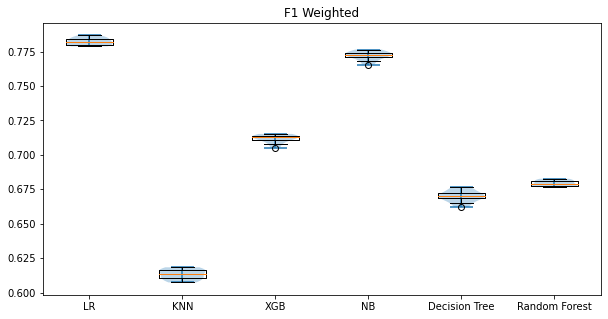

In [8]:
#Plotting the test results as boxplot
plt.figure(figsize=(10,5))
plt.violinplot(f1_score)
plt.boxplot(f1_score)
plt.xticks(range(1,len(model_name)+1),model_name)
plt.title("F1 Weighted")
plt.show()

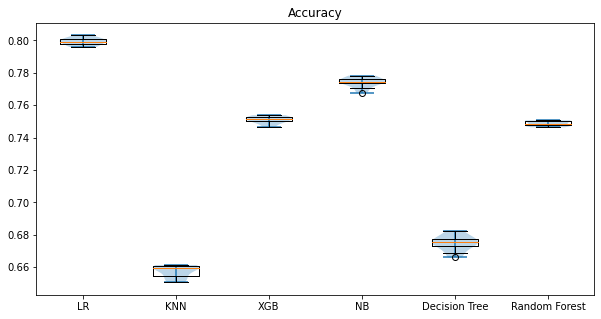

In [9]:
#Plotting the test results as boxplot
plt.figure(figsize=(10,5))
plt.violinplot(acc_score)
plt.boxplot(acc_score)
plt.xticks(range(1,len(model_name)+1),model_name)
plt.title("Accuracy")
plt.show()

In [10]:
# Import RandomnsearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(max_iter=1000)

param_distributions = {'solver': ['newton-cg','lbfgs','liblinear','sag','saga'],
              'C': [100, 10, 1.0, 0.1, 0.01]}

random_search = RandomizedSearchCV(lr_classifier,
                        param_distributions=param_distributions,
                        scoring='f1_weighted',
                        cv=10,
                        verbose=10,
                        n_jobs=-1)

random_search.fit(train_data, train_label)
lr_opt = random_search.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=10, solver=liblinear....................................
[CV 1/10; 1/10] END ..................C=10, solver=liblinear; total time=14.8min
[CV 2/10; 1/10] START C=10, solver=liblinear....................................
[CV 2/10; 1/10] END ..................C=10, solver=liblinear; total time=20.4min
[CV 3/10; 1/10] START C=10, solver=liblinear....................................
[CV 3/10; 1/10] END ..................C=10, solver=liblinear; total time=14.2min
[CV 4/10; 1/10] START C=10, solver=liblinear....................................
[CV 4/10; 1/10] END ..................C=10, solver=liblinear; total time=19.3min
[CV 5/10; 1/10] START C=10, solver=liblinear....................................
[CV 5/10; 1/10] END ..................C=10, solver=liblinear; total time=24.5min
[CV 6/10; 1/10] START C=10, solver=liblinear....................................
[CV 6/10; 1/10] END ..................C=10, so

/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 1/10; 2/10] END ......................C=1.0, solver=saga; total time= 7.0min
[CV 2/10; 2/10] START C=1.0, solver=saga........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 2/10; 2/10] END ......................C=1.0, solver=saga; total time= 3.8min
[CV 3/10; 2/10] START C=1.0, solver=saga........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 3/10; 2/10] END ......................C=1.0, solver=saga; total time= 3.5min
[CV 4/10; 2/10] START C=1.0, solver=saga........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 4/10; 2/10] END ......................C=1.0, solver=saga; total time= 3.6min
[CV 5/10; 2/10] START C=1.0, solver=saga........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 5/10; 2/10] END ......................C=1.0, solver=saga; total time= 3.6min
[CV 6/10; 2/10] START C=1.0, solver=saga........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 6/10; 2/10] END ......................C=1.0, solver=saga; total time= 3.6min
[CV 7/10; 2/10] START C=1.0, solver=saga........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 7/10; 2/10] END ......................C=1.0, solver=saga; total time= 3.6min
[CV 8/10; 2/10] START C=1.0, solver=saga........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 8/10; 2/10] END ......................C=1.0, solver=saga; total time= 3.6min
[CV 9/10; 2/10] START C=1.0, solver=saga........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 9/10; 2/10] END ......................C=1.0, solver=saga; total time= 3.6min
[CV 10/10; 2/10] START C=1.0, solver=saga.......................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 10/10; 2/10] END .....................C=1.0, solver=saga; total time= 3.6min
[CV 1/10; 3/10] START C=0.1, solver=sag.........................................
[CV 1/10; 3/10] END .......................C=0.1, solver=sag; total time=  38.1s
[CV 2/10; 3/10] START C=0.1, solver=sag.........................................
[CV 2/10; 3/10] END .......................C=0.1, solver=sag; total time=  36.6s
[CV 3/10; 3/10] START C=0.1, solver=sag.........................................
[CV 3/10; 3/10] END .......................C=0.1, solver=sag; total time=  40.2s
[CV 4/10; 3/10] START C=0.1, solver=sag.........................................
[CV 4/10; 3/10] END .......................C=0.1, solver=sag; total time=  41.5s
[CV 5/10; 3/10] START C=0.1, solver=sag.........................................
[CV 5/10; 3/10] END .......................C=0.1, solver=sag; total time=  42.1s
[CV 6/10; 3/10] START C=0.1, solver=sag.........................................
[CV 6/10; 3/10] END ........

/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 1/10; 6/10] END ......................C=10, solver=lbfgs; total time= 4.5min
[CV 2/10; 6/10] START C=10, solver=lbfgs........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 2/10; 6/10] END ......................C=10, solver=lbfgs; total time= 4.4min
[CV 3/10; 6/10] START C=10, solver=lbfgs........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 3/10; 6/10] END ......................C=10, solver=lbfgs; total time= 4.4min
[CV 4/10; 6/10] START C=10, solver=lbfgs........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 4/10; 6/10] END ......................C=10, solver=lbfgs; total time= 4.4min
[CV 5/10; 6/10] START C=10, solver=lbfgs........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 5/10; 6/10] END ......................C=10, solver=lbfgs; total time= 4.4min
[CV 6/10; 6/10] START C=10, solver=lbfgs........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 6/10; 6/10] END ......................C=10, solver=lbfgs; total time= 4.5min
[CV 7/10; 6/10] START C=10, solver=lbfgs........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 7/10; 6/10] END ......................C=10, solver=lbfgs; total time= 4.4min
[CV 8/10; 6/10] START C=10, solver=lbfgs........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 8/10; 6/10] END ......................C=10, solver=lbfgs; total time= 4.4min
[CV 9/10; 6/10] START C=10, solver=lbfgs........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 9/10; 6/10] END ......................C=10, solver=lbfgs; total time= 4.4min
[CV 10/10; 6/10] START C=10, solver=lbfgs.......................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 10/10; 6/10] END .....................C=10, solver=lbfgs; total time= 4.4min
[CV 1/10; 7/10] START C=0.1, solver=lbfgs.......................................
[CV 1/10; 7/10] END .....................C=0.1, solver=lbfgs; total time= 1.3min
[CV 2/10; 7/10] START C=0.1, solver=lbfgs.......................................
[CV 2/10; 7/10] END .....................C=0.1, solver=lbfgs; total time= 1.3min
[CV 3/10; 7/10] START C=0.1, solver=lbfgs.......................................
[CV 3/10; 7/10] END .....................C=0.1, solver=lbfgs; total time= 1.4min
[CV 4/10; 7/10] START C=0.1, solver=lbfgs.......................................
[CV 4/10; 7/10] END .....................C=0.1, solver=lbfgs; total time= 1.3min
[CV 5/10; 7/10] START C=0.1, solver=lbfgs.......................................
[CV 5/10; 7/10] END .....................C=0.1, solver=lbfgs; total time= 1.4min
[CV 6/10; 7/10] START C=0.1, solver=lbfgs.......................................
[CV 6/10; 7/10] END ........

/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 1/10; 9/10] END .......................C=100, solver=sag; total time= 3.1min
[CV 2/10; 9/10] START C=100, solver=sag.........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 2/10; 9/10] END .......................C=100, solver=sag; total time= 3.1min
[CV 3/10; 9/10] START C=100, solver=sag.........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 3/10; 9/10] END .......................C=100, solver=sag; total time= 3.1min
[CV 4/10; 9/10] START C=100, solver=sag.........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 4/10; 9/10] END .......................C=100, solver=sag; total time= 3.1min
[CV 5/10; 9/10] START C=100, solver=sag.........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 5/10; 9/10] END .......................C=100, solver=sag; total time= 3.2min
[CV 6/10; 9/10] START C=100, solver=sag.........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 6/10; 9/10] END .......................C=100, solver=sag; total time= 3.1min
[CV 7/10; 9/10] START C=100, solver=sag.........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 7/10; 9/10] END .......................C=100, solver=sag; total time= 3.2min
[CV 8/10; 9/10] START C=100, solver=sag.........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 8/10; 9/10] END .......................C=100, solver=sag; total time= 3.2min
[CV 9/10; 9/10] START C=100, solver=sag.........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 9/10; 9/10] END .......................C=100, solver=sag; total time= 3.1min
[CV 10/10; 9/10] START C=100, solver=sag........................................


/home/azureuser/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV 10/10; 9/10] END ......................C=100, solver=sag; total time= 3.1min
[CV 1/10; 10/10] START C=1.0, solver=newton-cg..................................
[CV 1/10; 10/10] END ................C=1.0, solver=newton-cg; total time= 3.1min
[CV 2/10; 10/10] START C=1.0, solver=newton-cg..................................
[CV 2/10; 10/10] END ................C=1.0, solver=newton-cg; total time= 3.0min
[CV 3/10; 10/10] START C=1.0, solver=newton-cg..................................
[CV 3/10; 10/10] END ................C=1.0, solver=newton-cg; total time= 3.1min
[CV 4/10; 10/10] START C=1.0, solver=newton-cg..................................
[CV 4/10; 10/10] END ................C=1.0, solver=newton-cg; total time= 3.2min
[CV 5/10; 10/10] START C=1.0, solver=newton-cg..................................
[CV 5/10; 10/10] END ................C=1.0, solver=newton-cg; total time= 3.3min
[CV 6/10; 10/10] START C=1.0, solver=newton-cg..................................
[CV 6/10; 10/10] END .......

In [11]:
print('='*50)
print("best params: " + str(random_search.best_params_))
print('best score:', random_search.best_score_)
print('='*50)

best params: {'solver': 'newton-cg', 'C': 0.1}
best score: 0.7886700289213612


In [12]:
import pickle 

with open('binfiles/model_lr.pkl','wb') as file:
    pickle.dump(lr_opt,file)